# Spatial Data Analysis - for summer and winter season
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

## Import initial libraries

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt

## Working with Shape File

### Loading Census Tract Shape File¶

In [3]:
from geopandas import GeoDataFrame
shape_path="Data/CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)

In [4]:
ct_shape.index=ct_shape.BoroCT2010   #make my index equal to BoroCt2010


### Coordinate systems, projections, and transformations 

In [5]:

from fiona.crs import from_epsg
ct_shape.crs = from_epsg(4326) # epsg=4326: lat/on | 26918: NAD83/UTM zone 18N | epsg=2263 is US feet


In [6]:
NYC_Area=ct_shape.to_crs(epsg=2263).geometry.area.sum()/(2.788*10**7) # from ft2 to mi2 
print 'total NYC land area: %s (mi^2)'%str(NYC_Area)[:5] # from ft2 to mi2 #epsg=2263 is US feet

total NYC land area: 302.3 (mi^2)


### Visualize the Cencus Tract boundaries colored by boroughs

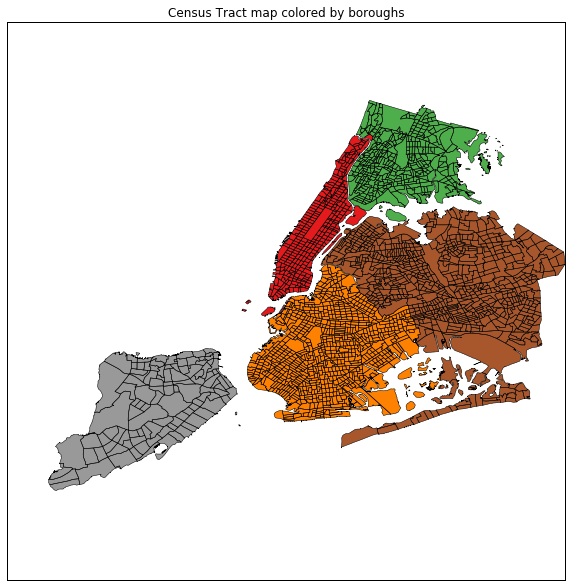

In [7]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(column='BoroCode',alpha=1,linewidth=0.5,ax=ax) #color based on my column brough  'BoroCode'
plt.title("Census Tract map colored by boroughs")

### Map NYC Population density

#### Load Census Data for 2010

In [9]:
ct_data=DataFrame.from_csv('Data/ACS_CT2010.csv')
#set index to be the BoroCT2010 code
ct_data.index=ct_data.BoroCT2010.astype(str)  #to string  
#so the data has the same index as my shape file 

#### Add popuation density to CT shapefile

In [10]:
ct_shape_pop=ct_shape.join(ct_data[['SE_T002_002']]) #SE_T002_002 is population density in social explorer dataset
#load data ... 

#### Vusualize the Population density for 2010

/opt/rh/anaconda/root/lib/python2.7/site-packages/geopandas/plotting.py:225: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  "(for consistency with matplotlib)", FutureWarning)


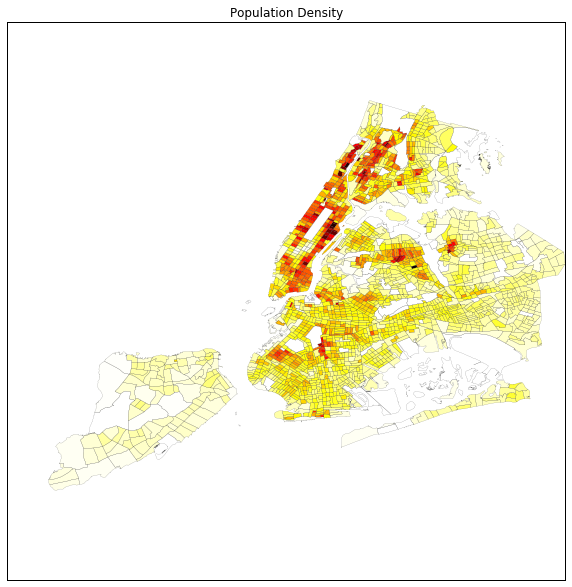

In [11]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_pop.plot(column='SE_T002_002',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)  #hot_r , heat map
# heat map: dark-- high value
plt.title("Population Density")

## Explore CitiBike data

### Load CitiBike data

In [13]:
df_bike_monthly=DataFrame.from_csv('Data/CitiBike_monthly_byStation.csv')
df_bike_monthly.head()
#data :  pick up from pick up station 

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,0
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def getMonth(s):
  return s.split("-")[1]

df_bike_monthly['month']= df_bike_monthly.index
df_bike_monthly['month'] = df_bike_monthly['month'].astype(str).apply(lambda x: getMonth(x))
df_bike_monthly.head()

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1534,1535,1536,1537,1538,1539,1540,1541,1542,month
starttime,,,,,,,,,,,,,,,,,,,,,
2013-07-31,2343,3914,6979,2750,4914,2229,2183,3139,3622,2368,...,0,0,0,0,0,0,0,0,0,07
2013-08-31,2696,4429,9020,3433,6645,2768,2761,3422,4271,2910,...,0,0,0,0,0,0,0,0,0,08
2013-09-30,2878,5258,9814,3739,7837,3206,2747,3590,4618,2885,...,0,0,0,0,0,0,0,0,0,09
2013-10-31,2920,4409,10456,3520,8928,3237,2530,3909,4169,2542,...,0,0,0,0,0,0,0,0,0,10
2013-11-30,1883,2731,6384,2446,5201,2085,1415,2727,3146,1539,...,0,0,0,0,0,0,0,0,0,11


In [19]:
df_bike_month = df_bike_monthly.groupby(df_bike_monthly.month).sum()
df_bike_month

,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
month,,,,,,,,,,,,,,,,,,,,,
01,2820,3006,10897,4346,6216,4502,1575,5396,2448,2235,...,0,0,0,0,0,0,0,0,0,0
02,2412,2911,9963,3677,5674,4297,1723,4882,1854,2059,...,0,0,0,0,0,0,0,0,0,0
03,3707,4740,16397,5371,9430,7216,3099,7886,3610,3543,...,0,0,0,0,0,0,0,0,0,0
04,5194,8405,21667,8217,14557,9925,4619,11998,5618,5083,...,310,0,0,0,0,0,0,0,0,0
05,6488,13275,28581,11073,19018,13067,6213,14416,7692,6787,...,901,62,20,2859,394,0,0,0,0,0
06,7756,10676,29213,11507,20534,13480,6155,14929,6389,7592,...,1036,0,0,7009,1109,665,2470,178,852,615
07,7151,10961,27145,10217,18352,10850,6563,12559,12510,7379,...,0,0,0,0,0,0,0,0,0,0
08,7515,11232,31017,11294,21004,11496,7444,13806,12865,7916,...,0,0,0,0,0,0,0,0,0,0
09,8274,13097,31462,11776,22859,13194,7612,14179,13183,8193,...,0,0,0,0,0,0,0,0,0,0


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


(-200, 16000)

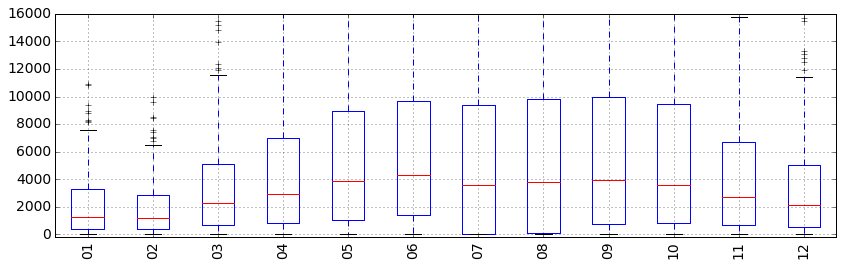

In [26]:
plt.rcParams['font.size']=14
f, ax = plt.subplots(figsize=(14,4))
#create a copy of the df for the viz purposes
df_bike_month=df_bike_month.copy()

df_bike_month.T.boxplot(figsize=(15,7),ax=ax,rot=90);   #create boxplot T:transpose
ax.set_ylim([-200,16000])
# we can see the season pattern


## Map CitiBike Data to CT level

### Load CitiBike station location data

In [22]:
station_id=DataFrame.from_csv('Data/Station_id.csv')
#convert station_ids to string index
station_id.index=station_id.index.astype(str)
station_id.head()
#index are station

,lat,lon
1000,40.753231,-73.970325
1001,40.749718,-74.002950
1002,40.730287,-73.990765
1003,40.718939,-73.992663
1004,40.734927,-73.992005


### Create CitiBike station Geometry (Point) from Corrdinates (Lat & Lon)

In [23]:
import shapely
# combine lat and lon to one column
station_id['lonlat']=zip(station_id.lon,station_id.lat)
# Create Point Geometry for based on lonlat column
station_id['geometry']=station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x)) # use the shapely.geometry.Point 
station_id.head()
#so we get a geometry point

,lat,lon,lonlat,geometry
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098)
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753)
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666)
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904)
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695)


### Intersect the two geometries

In [24]:
#intersects  找交集?
a=[]
# check for each citibike stations to see what CT they are belong to
for i in range(len(station_id)):
    a.append(ct_shape[ct_shape.geometry.intersects(station_id.iloc[i].geometry)].BoroCT2010.values[0])
    print '\r',"%",str((i+1)*100./len(station_id))[:4],
station_id['BoroCT2010']=a

% 100.


In [25]:
station_id.BoroCT2010.head()

1000    1009000
1001    1009900
1002    1005700
1003    1001800
1004    1006100
Name: BoroCT2010, dtype: object

### Add Monthly rides to the station GeoDataFrame with CT code

In [27]:
df_bike_month


,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,...,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542
month,,,,,,,,,,,,,,,,,,,,,
01,2820,3006,10897,4346,6216,4502,1575,5396,2448,2235,...,0,0,0,0,0,0,0,0,0,0
02,2412,2911,9963,3677,5674,4297,1723,4882,1854,2059,...,0,0,0,0,0,0,0,0,0,0
03,3707,4740,16397,5371,9430,7216,3099,7886,3610,3543,...,0,0,0,0,0,0,0,0,0,0
04,5194,8405,21667,8217,14557,9925,4619,11998,5618,5083,...,310,0,0,0,0,0,0,0,0,0
05,6488,13275,28581,11073,19018,13067,6213,14416,7692,6787,...,901,62,20,2859,394,0,0,0,0,0
06,7756,10676,29213,11507,20534,13480,6155,14929,6389,7592,...,1036,0,0,7009,1109,665,2470,178,852,615
07,7151,10961,27145,10217,18352,10850,6563,12559,12510,7379,...,0,0,0,0,0,0,0,0,0,0
08,7515,11232,31017,11294,21004,11496,7444,13806,12865,7916,...,0,0,0,0,0,0,0,0,0,0
09,8274,13097,31462,11776,22859,13194,7612,14179,13183,8193,...,0,0,0,0,0,0,0,0,0,0


In [44]:
### Create average monthly rides column from monthly citibike data and add it to the station id which has the geometry
station_id['summer']=df_bike_month[5:8].sum()
station_id['winter']=df_bike_month.ix[[11,0,1],:].sum()
#homework need to change this code to 

In [45]:
station_id.head()

,lat,lon,lonlat,geometry,BoroCT2010,summer,winter
1000,40.753231,-73.970325,"(-73.97032517, 40.75323098)",POINT (-73.97032517 40.75323098),1009000,22422,9456
1001,40.749718,-74.002950,"(-74.002950346, 40.749717753)",POINT (-74.00295034600001 40.749717753),1009900,32869,11373
1002,40.730287,-73.990765,"(-73.9907647, 40.73028666)",POINT (-73.9907647 40.73028666),1005700,87375,36543
1003,40.718939,-73.992663,"(-73.99266288, 40.71893904)",POINT (-73.99266288 40.71893904),1001800,33018,14170
1004,40.734927,-73.992005,"(-73.99200509, 40.73492695)",POINT (-73.99200509000001 40.73492695),1006100,59890,21889


### Add the monthly average rides to the CT shapefile 

In [47]:
# use the 
temp=station_id[['summer', 'winter']]
temp['station_id']=station_id.index
temp.index=station_id['BoroCT2010']


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [48]:
ct_shape_MonthlyAve=ct_shape.join(temp)
ct_shape_MonthlyAve.fillna(0,inplace=True)

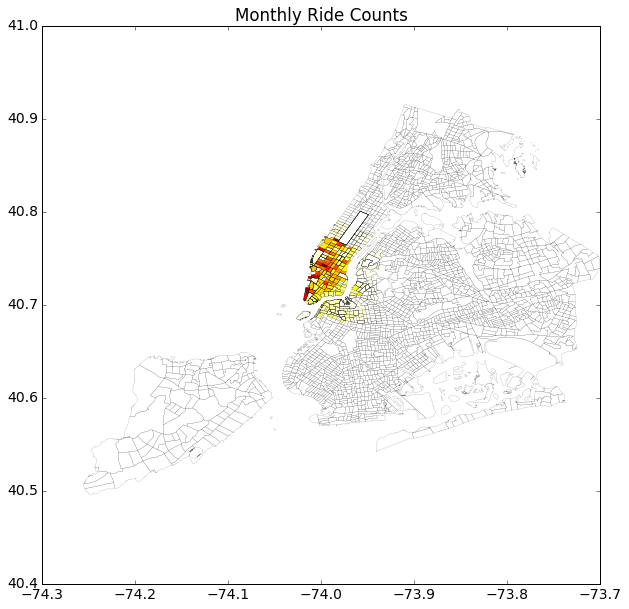

In [61]:
f, ax = plt.subplots(figsize=(10,10))
ct_shape_MonthlyAve.plot(column='summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts")

### Removing the CTs that are out of zoom boundries

In [57]:
ct_shape_MonthlyAve_Zoom=(ct_shape_MonthlyAve[ct_shape_MonthlyAve
                           .centroid
                           .apply(lambda c:c.x>-74.1 and c.x<-73.92 and c.y>40.65 and c.y<40.8)])
#give the boundary ... mask true or false .. Zoom 

In [59]:
print "Total number of CTs:", len(ct_shape)
print "Number of zoomed summer CTs:", len(temp.summer)
print "Number of zoomed winter CTs:", len(temp.winter)

Total number of CTs: 2166
Number of zoomed summer CTs: 543
Number of zoomed winter CTs: 543


### Map the monthly rides 

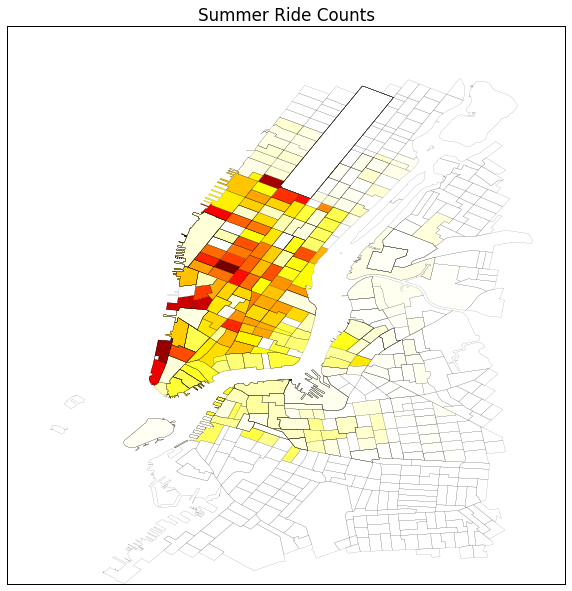

In [63]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='summer',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title('Summer Ride Counts')

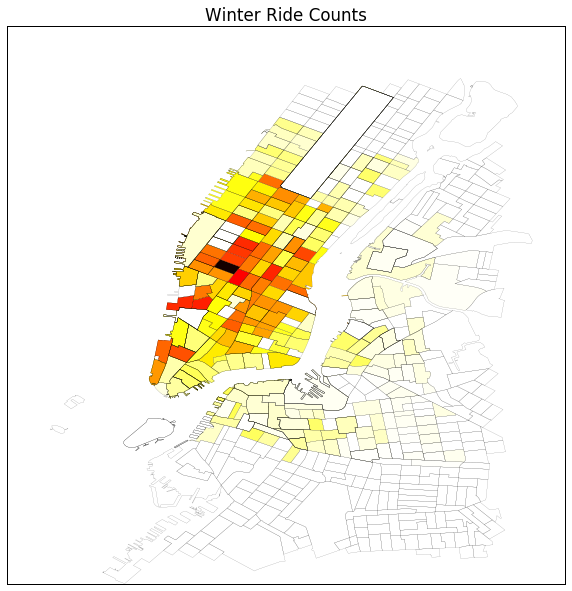

In [64]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape_MonthlyAve_Zoom.plot(column='winter',colormap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title('Winter Ride Counts')

### Export Shapefile CTs in the CitiBike Zone

In [66]:
path='Output/ct_shape_MonthlyAve_Zoom.shp'
ct_shape_MonthlyAve_Zoom.to_file(path)

## Exploratory Geospatial Analysis

In [67]:
import pysal as ps
#pysal

### Spatial Weights
Contiguity: Queen Weights

In [68]:
qW_CT=ps.queen_from_shapefile(path)

('Island id: ', [0])


#### Neighbors of index10

In [69]:
qW_CT[8]

{1: 1.0, 9: 1.0, 10: 1.0, 18: 1.0, 19: 1.0, 30: 1.0, 37: 1.0, 38: 1.0, 39: 1.0}

In [70]:
qW_CT.cardinalities[10]

9

#### Matrix of Weights

In [71]:
Wmatrix, ids = qW_CT.full()

In [72]:
Wmatrix

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

#### Change the matrix to be row-standardized

In [73]:
qW_CT.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')


### Spatial Lag  
Similarity of CT neibors can be meseard by means of spatial lag as follow:
$$BikeRideCountLag = \sum_j w_{i,j} BikeRideCount$$

In [74]:
summer_MonthlyRide=ct_shape_MonthlyAve_Zoom.summer
winter_MonthlyRide=ct_shape_MonthlyAve_Zoom.winter
summer_MonthlyRideLag=ps.lag_spatial(qW_CT, summer_MonthlyRide) # get lag  from weight 
winter_MonthlyRideLag=ps.lag_spatial(qW_CT, winter_MonthlyRide)

#### Create Quantiles for maping

In [79]:
summer_MonthlyRideLagQ10 = ps.Quantiles(summer_MonthlyRideLag, k=10) # create brackets..  different categorize 
winter_MonthlyRideLagQ10 = ps.Quantiles(winter_MonthlyRideLag, k=10)

#### Map the monthly rides lag

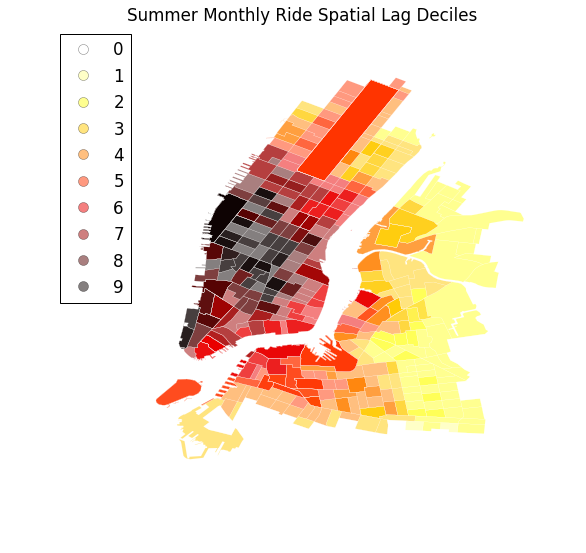

In [80]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=summer_MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title('Summer Monthly Ride Spatial Lag Deciles')
# create a heatmap
# different lag

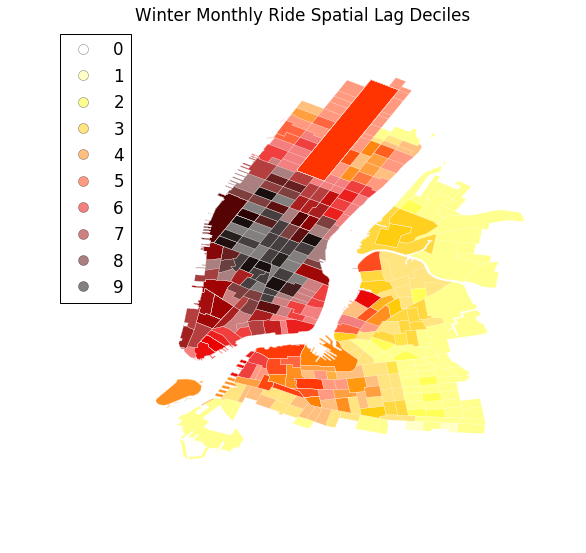

In [81]:
f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=winter_MonthlyRideLagQ10.yb).plot(column='cl', categorical=True, 
        k=10, cmap='hot_r', linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title('Winter Monthly Ride Spatial Lag Deciles')

## Global  Spatial Autocorrelation

In [95]:
s_b,s_a = np.polyfit(summer_MonthlyRide, summer_MonthlyRideLag, 1)
w_b,w_a = np.polyfit(winter_MonthlyRide, winter_MonthlyRideLag, 1)
# b =slope a= intercept

### Moran Scatterplot

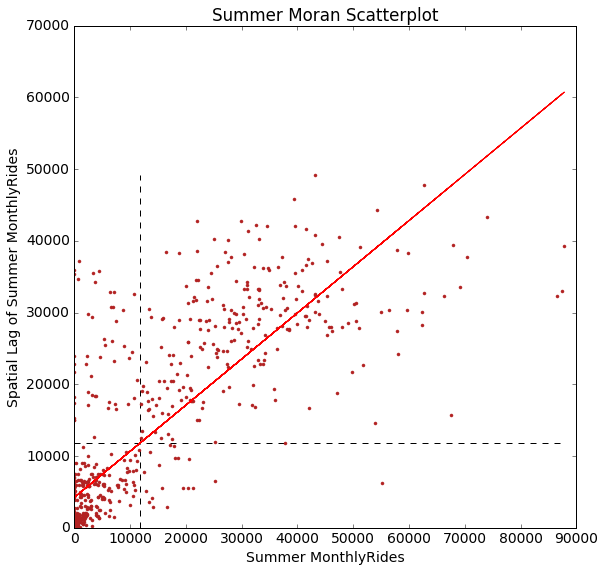

In [86]:
#Summer
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(summer_MonthlyRide, summer_MonthlyRideLag, '.', color='firebrick')

 # dashed vert at mean of the last year's PCI
plt.vlines(summer_MonthlyRide.mean(), summer_MonthlyRideLag.min(), summer_MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(summer_MonthlyRideLag.mean(), summer_MonthlyRide.min(), summer_MonthlyRide.max(), linestyle='--')
#high ridership about myself  , low ridership of neighbouhood   图4
# red line of best fit using global I as slope
plt.plot(summer_MonthlyRide, s_a + s_b*summer_MonthlyRide, 'r')
plt.title('Summer Moran Scatterplot')
plt.ylabel('Spatial Lag of Summer MonthlyRides')
plt.xlabel('Summer MonthlyRides')

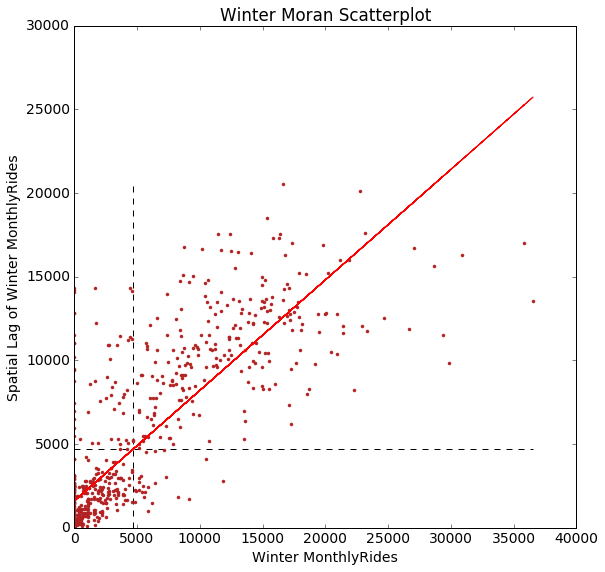

In [97]:
#Winter
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(winter_MonthlyRide, winter_MonthlyRideLag, '.', color='firebrick')
# dashed vert at mean of the last year's PCI
plt.vlines(winter_MonthlyRide.mean(), winter_MonthlyRideLag.min(), winter_MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(winter_MonthlyRideLag.mean(), winter_MonthlyRide.min(), winter_MonthlyRide.max(), linestyle='--')

plt.plot(winter_MonthlyRide, w_a + w_b*winter_MonthlyRide, 'r')
plt.title('Winter Moran Scatterplot')
plt.ylabel('Spatial Lag of Winter MonthlyRides')
plt.xlabel('Winter MonthlyRides')

### Moran's I

In [98]:
I_MonthlyRide_s = ps.Moran(summer_MonthlyRide, qW_CT)   
I_MonthlyRide_w = ps.Moran(winter_MonthlyRide, qW_CT) 

In [101]:
I_MonthlyRide_s.I, I_MonthlyRide_s.p_sim  

(0.64353398667011008, 0.001)

In [102]:
I_MonthlyRide_w.I, I_MonthlyRide_w.p_sim

(0.66039156431885593, 0.001)

Thus, the $I$ statistic is $0.643$ or $0.660$ for this data, and has a very small $p$ value. 

In [103]:
I_MonthlyRide_s.sim[0:10]

array([-0.02577114, -0.00785127, -0.01398495,  0.0236907 ,  0.01236251,
        0.00806855, -0.0278845 , -0.01770703,  0.00174716, -0.0235484 ])

### KDEplot of all of the simulated points
the vertical line shows the observed value

In [105]:
import seaborn as sns
plt.rcParams['figure.figsize']=(14,3)

(-0.7, 0.7)

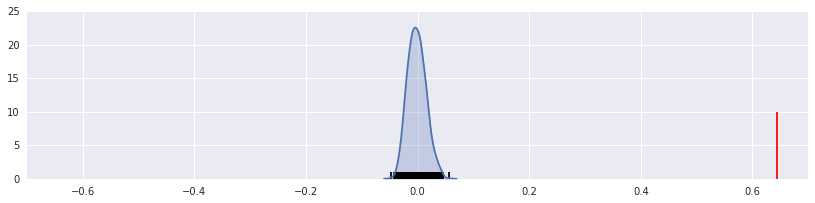

In [108]:
sns.kdeplot(I_MonthlyRide_s.sim, shade=True)
plt.vlines(I_MonthlyRide_s.sim, 0, 1)
plt.vlines(I_MonthlyRide_s.I, 0, 10, 'r')
plt.xlim([-.70, .70])
#the plot shows very significant, high correlation... 

(-0.7, 0.7)

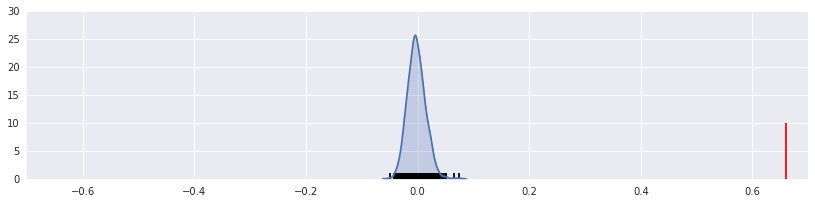

In [109]:
sns.kdeplot(I_MonthlyRide_w.sim, shade=True)
plt.vlines(I_MonthlyRide_w.sim, 0, 1)
plt.vlines(I_MonthlyRide_w.I, 0, 10, 'r')
plt.xlim([-.70, .70])

## Local  Spatial Autocorrelation

In [112]:
LMo_MonthlyRide_s = ps.Moran_Local(summer_MonthlyRide, qW_CT,permutations=999)   #999times  local moran
LMo_MonthlyRide_w = ps.Moran_Local(winter_MonthlyRide, qW_CT,permutations=999) 

In [113]:
LMo_MonthlyRide_s.Is[0:5], LMo_MonthlyRide_s.p_sim[0:5]

(array([-0.        , -0.2391325 ,  0.01474643,  0.00173718,  0.02473794]),
 array([ 0.001,  0.181,  0.357,  0.339,  0.364]))

In [114]:
LMo_MonthlyRide_w.Is[0:5], LMo_MonthlyRide_w.p_sim[0:5]

(array([ -0.00000000e+00,  -3.14119985e-01,  -1.93084894e-04,
         -4.03594530e-03,  -7.97531288e-02]),
 array([ 0.001,  0.133,  0.482,  0.496,  0.438]))

### LISA (Local Indicators of Spatial Autocorrelation)

In [116]:
#local correlation 
#look at the significant one p-value 
sigs_s = summer_MonthlyRide[LMo_MonthlyRide_s.p_sim <= .001]
W_sigs_s = summer_MonthlyRideLag[LMo_MonthlyRide_s.p_sim <= .001] #weight friend 
insigs_s = summer_MonthlyRide[LMo_MonthlyRide_s.p_sim > .001]#insignificant one 
W_insigs_s = summer_MonthlyRideLag[LMo_MonthlyRide_s.p_sim > .001]

In [118]:
sigs_w = winter_MonthlyRide[LMo_MonthlyRide_w.p_sim <= .001]
W_sigs_w = winter_MonthlyRideLag[LMo_MonthlyRide_w.p_sim <= .001] #weight friend 
insigs_w = winter_MonthlyRide[LMo_MonthlyRide_w.p_sim > .001]#insignificant one 
W_insigs_w = winter_MonthlyRideLag[LMo_MonthlyRide_w.p_sim > .001]

### Plot Signficant LISA

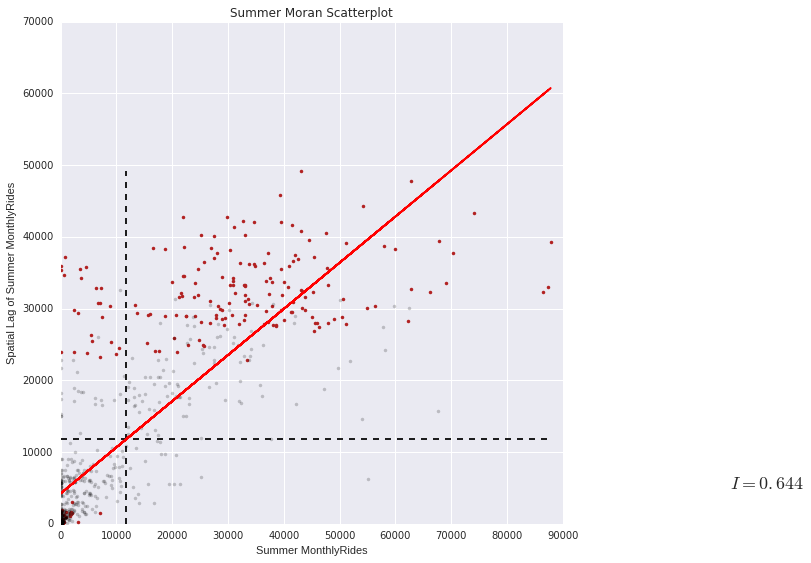

In [122]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(sigs_s, W_sigs_s, '.', color='firebrick')
plt.plot(insigs_s, W_insigs_s, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide_s.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(summer_MonthlyRide.mean(), summer_MonthlyRideLag.min(), summer_MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(summer_MonthlyRideLag.mean(), summer_MonthlyRide.min(), summer_MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(summer_MonthlyRide, s_a + s_b*summer_MonthlyRide, 'r')
plt.title('Summer Moran Scatterplot')
plt.ylabel('Spatial Lag of Summer MonthlyRides')
plt.xlabel('Summer MonthlyRides')


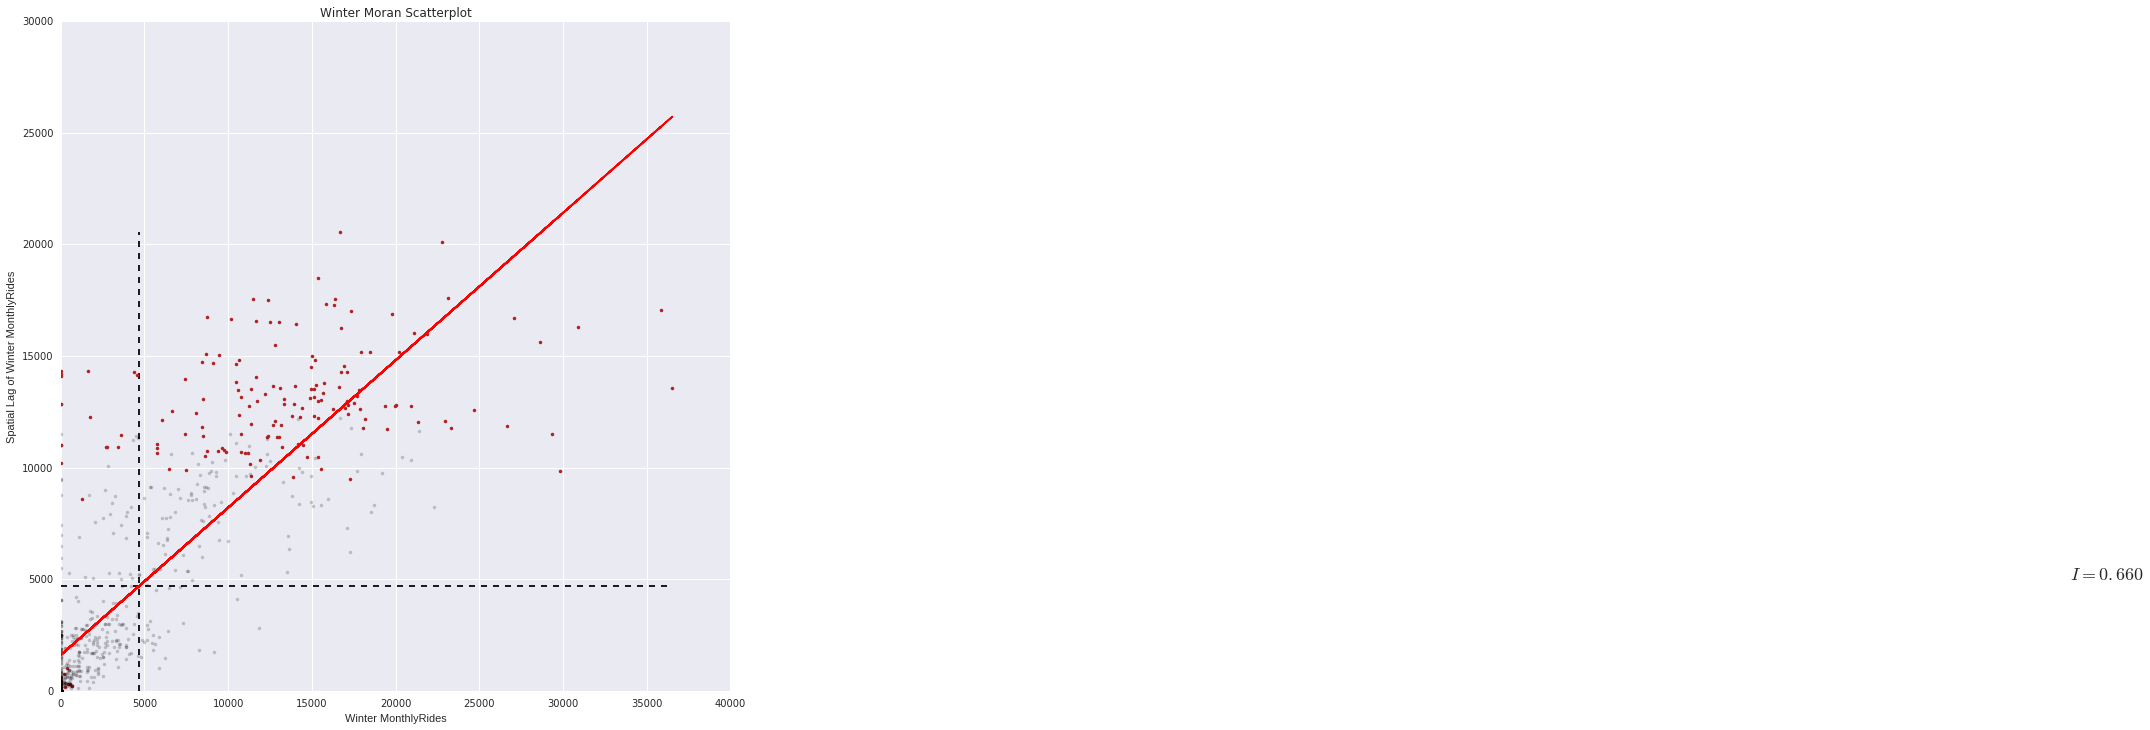

In [124]:
f, ax = plt.subplots(figsize=(12, 12))
plt.plot(sigs_w, W_sigs_w, '.', color='firebrick')
plt.plot(insigs_w, W_insigs_w, '.k', alpha=.2)
plt.text(s='$I = %.3f$' % I_MonthlyRide_w.I, x=120000, y=5000, fontsize=18)

 # dashed vert at mean of the last year's PCI
plt.vlines(winter_MonthlyRide.mean(), winter_MonthlyRideLag.min(), winter_MonthlyRideLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(winter_MonthlyRideLag.mean(), winter_MonthlyRide.min(), winter_MonthlyRide.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(winter_MonthlyRide, w_a + w_b*winter_MonthlyRide, 'r')
plt.title('Winter Moran Scatterplot')
plt.ylabel('Spatial Lag of Winter MonthlyRides')
plt.xlabel('Winter MonthlyRides')


### Hot and Cold spots 

In [128]:
sig_summer = LMo_MonthlyRide_s.p_sim < 0.01
hotspots_summer = LMo_MonthlyRide_s.q==1 * sig_summer #quantile
coldspots_summer = LMo_MonthlyRide_s.q==3 * sig_summer
print "Summer:"
print "Number of Hotspots:", hotspots_summer.sum()
print "Number of Coldspots:", coldspots_summer.sum()

Summer:
Number of Hotspots: 190
Number of Coldspots: 238


In [129]:
sig_winter = LMo_MonthlyRide_w.p_sim < 0.01
hotspots_winter= LMo_MonthlyRide_w.q==1 * sig_winter #quantile
coldspots_winter = LMo_MonthlyRide_w.q==3 * sig_winter
print "Winter:"
print "Number of Hotspots:", hotspots_winter.sum()
print "Number of Coldspots:", coldspots_winter.sum()

Winter:
Number of Hotspots: 191
Number of Coldspots: 205


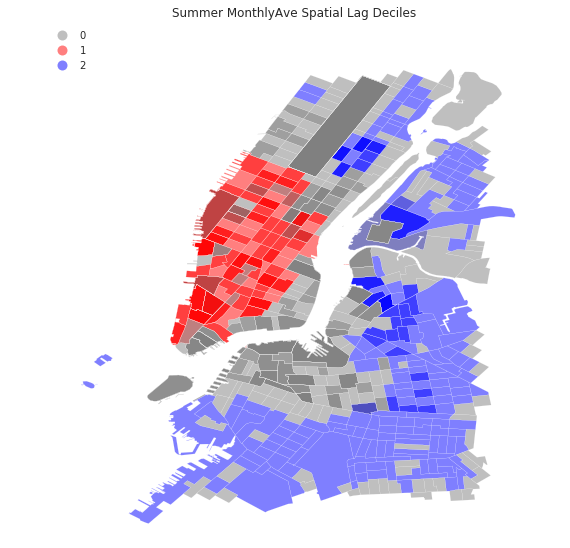

In [131]:
from matplotlib import colors
hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold_summer = hotspots_summer*1 + coldspots_summer*2   #true be 1 , false be 0 ,  here are two boolean. 2for coldspot, 1 for hot spot

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold_summer).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Summer MonthlyAve Spatial Lag Deciles")

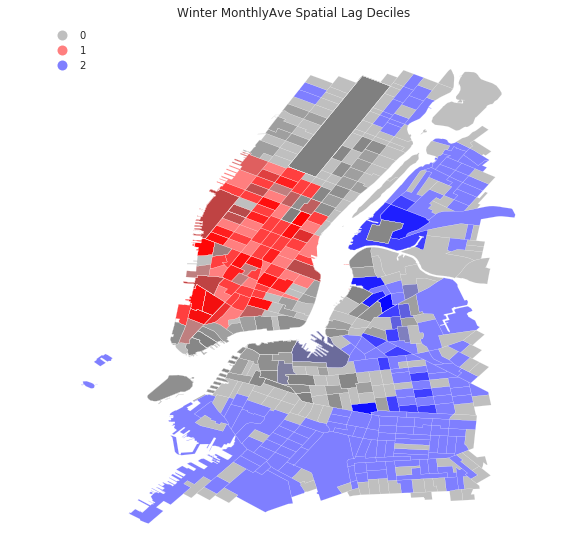

In [132]:
hcmap = colors.ListedColormap(['grey','red','blue'])
hotcold_winter = hotspots_winter*1 + coldspots_winter*2   #true be 1 , false be 0 ,  here are two boolean. 2for coldspot, 1 for hot spot

f, ax = plt.subplots(figsize=(9, 9))
ct_shape_MonthlyAve_Zoom.assign(cl=hotcold_winter).plot(column='cl', categorical=True, 
        k=10, cmap=hcmap, linewidth=0.1, ax=ax, 
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Winter MonthlyAve Spatial Lag Deciles")